In [2]:
pip install cartopy matplotlib pandas

  Obtaining dependency information for cartopy from https://files.pythonhosted.org/packages/4f/ce/ba4baced164ecd78b4109cd611d7b64d256f012784e944c1b0f6f5dff5c1/Cartopy-0.24.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for shapely>=1.8 from https://files.pythonhosted.org/packages/93/5b/842022c00fbb051083c1c85430f3bb55565b7fd2d775f4f398c0ba8052ce/shapely-2.1.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for pyshp>=2.3 from https://files.pythonhosted.org/packages/98/2f/68116db5b36b895c0450e3072b8cb6c2fac0359279b182ea97014d3c8ac0/pyshp-2.3.1-py2.py3-none-any.whl.metadata
     ---------------------------------------- 0.0/56.0 kB ? eta -:--:--
     ------- -------------------------------- 10.2/56.0 kB ? eta -:--:--
     -------------------------------------- 56.0/56.0 kB 973.0 kB/s eta 0:00:00
  Obtaining dependency information for pyproj>=3.3.1 from https://files.pythonhosted.org/packages/92/39/ef6f06a5b223dbea308cfcbb7a0f72e7b506aef1850e0

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

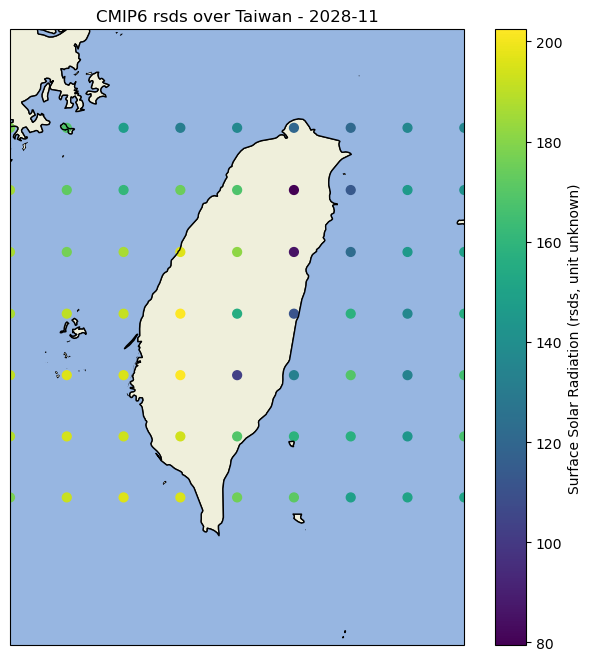

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# 1. Load and prepare data
df = pd.read_csv(r"C:\Users\User\Downloads\rsds_radiation_CNRM_CM6_ssp245_2015_2099.csv")

# Clean column names in case of whitespace
df.columns = df.columns.str.strip()

# Convert time column to datetime
df["time"] = pd.to_datetime(df["time"])

# 2. Filter for a specific month (e.g., Jan 2015)
target_month = "2028-11"
df_month = df[df["time"].dt.strftime("%Y-%m") == target_month]

vmin=50
vmax=200

# 3. Set up the map of Taiwan
fig = plt.figure(figsize=(8, 8))
ax = plt.axes(projection=ccrs.Mercator())
ax.set_extent([119, 123, 21, 26], crs=ccrs.PlateCarree())  # Taiwan bounds

# 4. Add features
ax.coastlines(resolution='10m')
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.OCEAN)

# 5. Plot data
sc = ax.scatter(
    df_month["lon"], df_month["lat"],
    c=df_month["rsds"], cmap="viridis", s=40,
    transform=ccrs.PlateCarree()
)

# 6. Colorbar and title
plt.colorbar(sc, ax=ax, label="Surface Solar Radiation (rsds, unit unknown)")
plt.title(f"CMIP6 rsds over Taiwan - {target_month}")
plt.show()


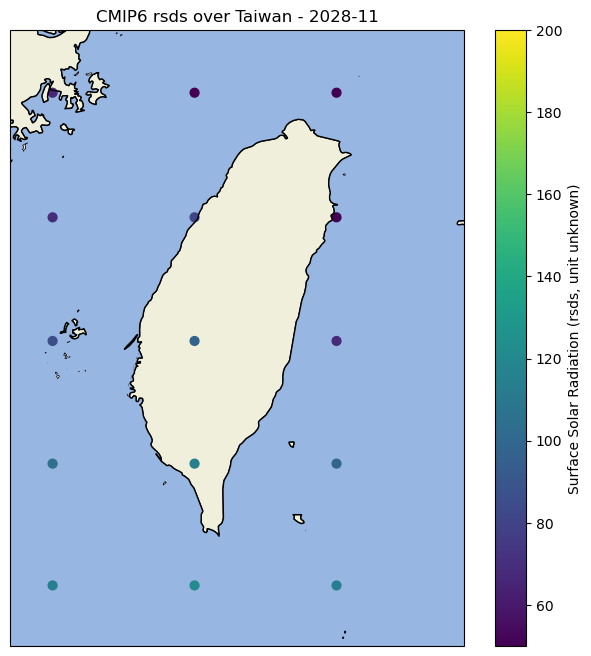

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# 1. Load and prepare data
df = pd.read_csv(r"C:\Users\User\Downloads\rsds_radiation_GFDL_ESM4_ssp245_2015_2099_date_corrected.csv")
#"C:\Users\User\Downloads\rsds_radiation_GFDL_ESM4_ssp245_2015_2099_date_corrected.csv"

df.columns = df.columns.str.strip()

# Convert time column to datetime
df["time"] = pd.to_datetime(df["time"])

# 2. Filter for a specific month (e.g., Jan 2015)
target_month = "2028-11"
df_month = df[df["time"].dt.strftime("%Y-%m") == target_month]

vmin=50
vmax=200

# 3. Set up the map of Taiwan
fig = plt.figure(figsize=(8, 8))
ax = plt.axes(projection=ccrs.Mercator())
ax.set_extent([119, 123, 21, 26], crs=ccrs.PlateCarree())  # Taiwan bounds

# 4. Add features
ax.coastlines(resolution='10m')
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.OCEAN)

# 5. Plot data
sc = ax.scatter(
    df_month["lon"], df_month["lat"],
    c=df_month["rsds"], cmap="viridis", s=40,
    vmin=vmin, vmax=vmax,  # ✅ Fix scale here
    transform=ccrs.PlateCarree()
)

# 6. Colorbar and title
plt.colorbar(sc, ax=ax, label="Surface Solar Radiation (rsds, unit unknown)")
plt.title(f"CMIP6 rsds over Taiwan - {target_month}")
plt.show()


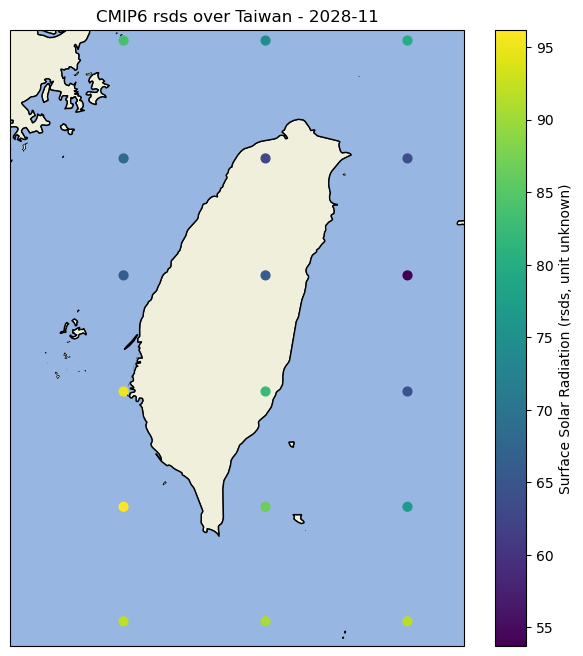

In [31]:
#"C:\Users\User\Downloads\rsds_radiation_TaiESM1_ssp245_2015_2099_date_shifted.csv"

# 1. Load and prepare data
df = pd.read_csv(r"C:\Users\User\Downloads\rsds_radiation_TaiESM1_ssp245_2015_2099_date_shifted.csv")
#"C:\Users\User\Downloads\rsds_radiation_GFDL_ESM4_ssp245_2015_2099_date_corrected.csv"

df.columns = df.columns.str.strip()

# Convert time column to datetime
df["time"] = pd.to_datetime(df["time"])

# 2. Filter for a specific month (e.g., Jan 2015)
target_month = "2028-11"
df_month = df[df["time"].dt.strftime("%Y-%m") == target_month]

# 3. Set up the map of Taiwan
fig = plt.figure(figsize=(8, 8))
ax = plt.axes(projection=ccrs.Mercator())
ax.set_extent([119, 123, 21, 26], crs=ccrs.PlateCarree())  # Taiwan bounds

# 4. Add features
ax.coastlines(resolution='10m')
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.OCEAN)

# 5. Plot data
sc = ax.scatter(
    df_month["lon"], df_month["lat"],
    c=df_month["rsds"], cmap="viridis", s=40,
    transform=ccrs.PlateCarree()
)

# 6. Colorbar and title
plt.colorbar(sc, ax=ax, label="Surface Solar Radiation (rsds, unit unknown)")
plt.title(f"CMIP6 rsds over Taiwan - {target_month}")
plt.show()


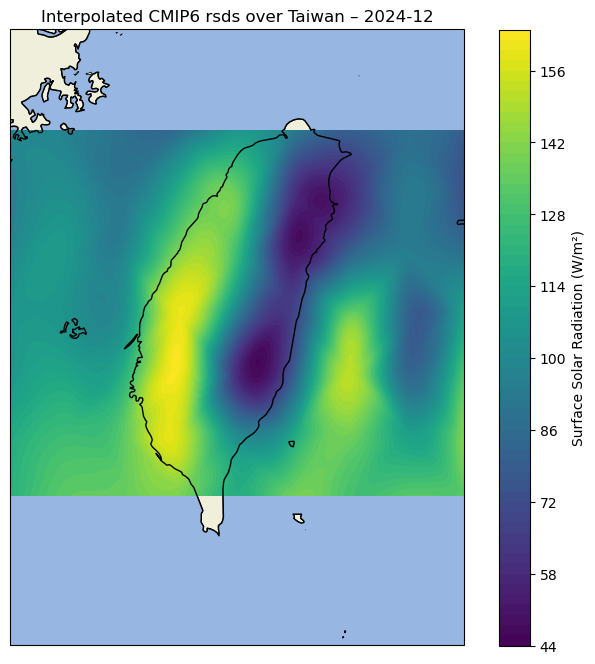

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from scipy.interpolate import griddata

# 1. Load and prepare data
df = pd.read_csv(r"C:\Users\User\Downloads\rsds_radiation_CNRM_CM6_ssp245_2015_2099.csv")
df.columns = df.columns.str.strip()
df["time"] = pd.to_datetime(df["time"])

# 2. Filter for specific month
target_month = "2024-12"
df_month = df[df["time"].dt.strftime("%Y-%m") == target_month]

# 3. Create grid over Taiwan
num_points = 200
lon_grid = np.linspace(119, 123, num_points)
lat_grid = np.linspace(21, 26, num_points)
lon2d, lat2d = np.meshgrid(lon_grid, lat_grid)

# 4. Interpolate radiation values onto grid
points = df_month[["lon", "lat"]].values
values = df_month["rsds"].values
grid_rsds = griddata(points, values, (lon2d, lat2d), method='cubic')

# 5. Plot map
fig = plt.figure(figsize=(9, 8))
ax = plt.axes(projection=ccrs.Mercator())
ax.set_extent([119, 123, 21, 26], crs=ccrs.PlateCarree())
ax.coastlines(resolution='10m')
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.OCEAN)

# 6. Plot interpolated rsds values
cf = ax.contourf(
    lon2d, lat2d, grid_rsds, 60,
    transform=ccrs.PlateCarree(), cmap="viridis"
)

# 7. Add colorbar and title
plt.colorbar(cf, ax=ax, label="Surface Solar Radiation (W/m²)")
plt.title(f"Interpolated CMIP6 rsds over Taiwan – {target_month}")
plt.show()


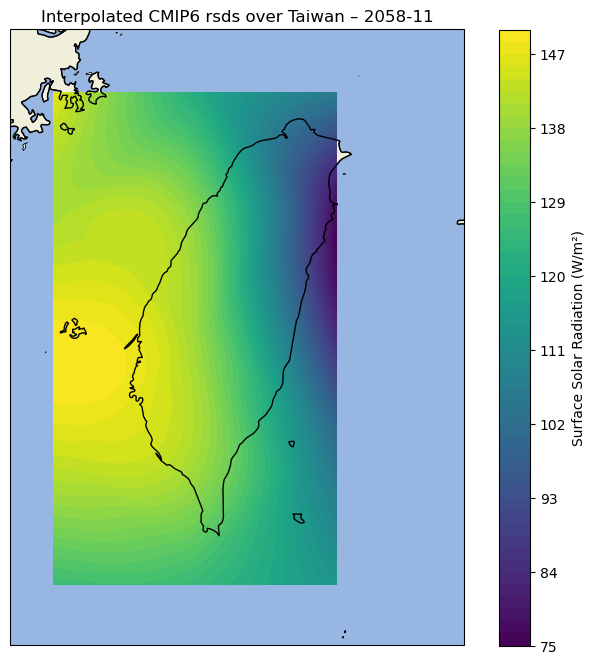

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from scipy.interpolate import griddata

# 1. Load and prepare data
df = pd.read_csv(r"C:\Users\User\Downloads\rsds_radiation_GFDL_ESM4_ssp245_2015_2099_date_corrected.csv")
#
df.columns = df.columns.str.strip()
df["time"] = pd.to_datetime(df["time"])

# 2. Filter for specific month
target_month = "2058-11"
df_month = df[df["time"].dt.strftime("%Y-%m") == target_month]

# 3. Create grid over Taiwan
num_points = 200
lon_grid = np.linspace(119, 123, num_points)
lat_grid = np.linspace(21, 26, num_points)
lon2d, lat2d = np.meshgrid(lon_grid, lat_grid)


# 4. Interpolate radiation values onto grid
points = df_month[["lon", "lat"]].values
values = df_month["rsds"].values
grid_rsds = griddata(points, values, (lon2d, lat2d), method='cubic')

# 5. Plot map
fig = plt.figure(figsize=(9, 8))
ax = plt.axes(projection=ccrs.Mercator())
ax.set_extent([119, 123, 21, 26], crs=ccrs.PlateCarree())
ax.coastlines(resolution='10m')
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.OCEAN)

# 6. Plot data
cf = ax.contourf(
    lon2d, lat2d, grid_rsds, 60,
    transform=ccrs.PlateCarree(), cmap="viridis"
)


# 7. Add colorbar and title
plt.colorbar(cf, ax=ax, label="Surface Solar Radiation (W/m²)")
plt.title(f"Interpolated CMIP6 rsds over Taiwan – {target_month}")
plt.show()


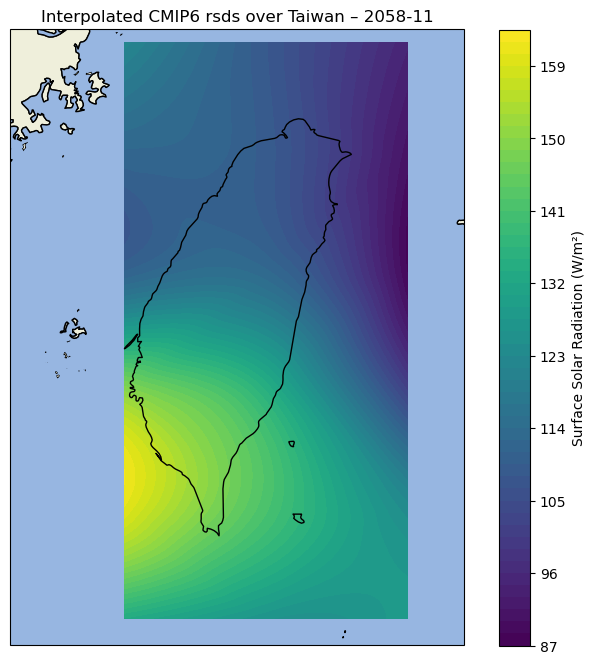

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from scipy.interpolate import griddata

vmin=50
vmax=200

# 1. Load and prepare data
df = pd.read_csv(r"C:\Users\User\Downloads\rsds_radiation_TaiESM1_ssp245_2015_2099_date_shifted.csv")
#"C:\Users\User\Downloads\rsds_radiation_TaiESM1_ssp245_2015_2099_date_shifted.csv"
df.columns = df.columns.str.strip()
df["time"] = pd.to_datetime(df["time"])

# 2. Filter for specific month
target_month = "2058-11"
df_month = df[df["time"].dt.strftime("%Y-%m") == target_month]

# 3. Create grid over Taiwan
num_points = 200
lon_grid = np.linspace(119, 123, num_points)
lat_grid = np.linspace(21, 26, num_points)
lon2d, lat2d = np.meshgrid(lon_grid, lat_grid)

# 4. Interpolate radiation values onto grid
points = df_month[["lon", "lat"]].values
values = df_month["rsds"].values
grid_rsds = griddata(points, values, (lon2d, lat2d), method='cubic')

# 5. Plot map
fig = plt.figure(figsize=(9, 8))
ax = plt.axes(projection=ccrs.Mercator())
ax.set_extent([119, 123, 21, 26], crs=ccrs.PlateCarree())
ax.coastlines(resolution='10m')
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.OCEAN)

# 6. Plot interpolated rsds values
cf = ax.contourf(
    lon2d, lat2d, grid_rsds, 60,
    transform=ccrs.PlateCarree(), cmap="viridis"
)


# 7. Add colorbar and title
plt.colorbar(cf, ax=ax, label="Surface Solar Radiation (W/m²)")
plt.title(f"Interpolated CMIP6 rsds over Taiwan – {target_month}")
plt.show()


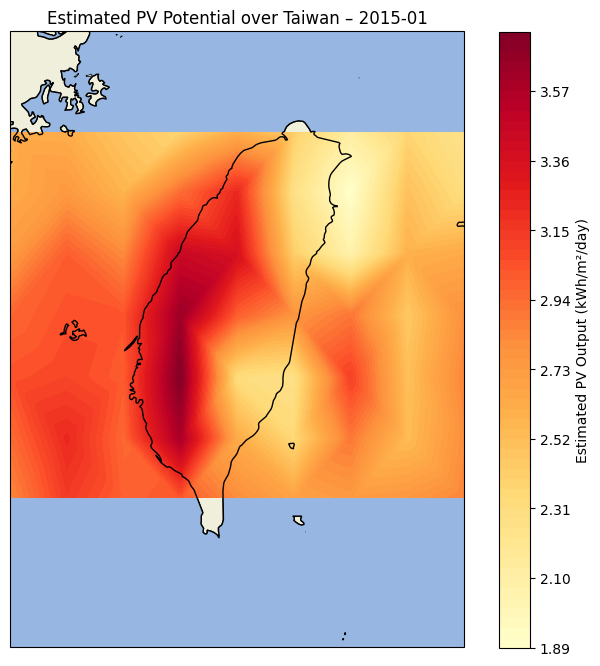

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from scipy.interpolate import griddata

# 1. Load and prepare data
df = pd.read_csv(r"C:\Users\User\Downloads\rsds_radiation_CNRM_CM6_ssp245_2015_2099.csv")
df.columns = df.columns.str.strip()
df["time"] = pd.to_datetime(df["time"])

# 2. Filter for a specific month
target_month = "2015-01"
df_month = df[df["time"].dt.strftime("%Y-%m") == target_month].copy()

# 3. Estimate PVOUT (in kWh/m²/day)
# PR = 0.8 (performance ratio), 24 hours/day, ÷1000 for Wh → kWh
df_month["pvout"] = df_month["rsds"] * 0.8 * 24 / 1000

# 4. Create grid over Taiwan
num_points = 200
lon_grid = np.linspace(119, 123, num_points)
lat_grid = np.linspace(21, 26, num_points)
lon2d, lat2d = np.meshgrid(lon_grid, lat_grid)

# 5. Interpolate PVOUT onto the grid
points = df_month[["lon", "lat"]].values
values = df_month["pvout"].values
grid_pvout = griddata(points, values, (lon2d, lat2d), method='linear')

# 6. Plot map
fig = plt.figure(figsize=(9, 8))
ax = plt.axes(projection=ccrs.Mercator())
ax.set_extent([119, 123, 21, 26], crs=ccrs.PlateCarree())
ax.coastlines(resolution='10m')
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.OCEAN)

# 7. Plot interpolated PVOUT
cf = ax.contourf(
    lon2d, lat2d, grid_pvout, 60,
    transform=ccrs.PlateCarree(), cmap="YlOrRd"
)

# 8. Add colorbar and title
plt.colorbar(cf, ax=ax, label="Estimated PV Output (kWh/m²/day)")
plt.title(f"Estimated PV Potential over Taiwan – {target_month}")
plt.show()


c:\Users\User\anaconda3\Lib\site-packages\cartopy\io\__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_cultural/ne_10m_admin_0_countries.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


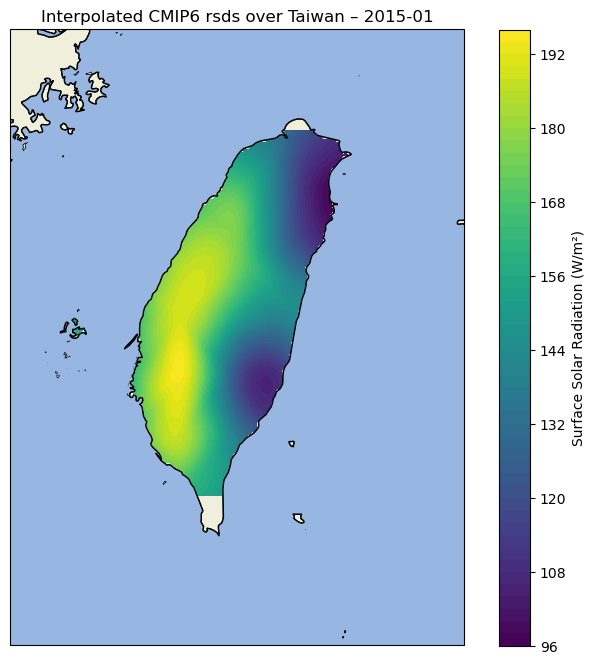

In [1]:
# ======================================
# Interpolated CMIP6 rsds over Taiwan – Masked to Land Region Only
# ======================================

import pandas as pd
import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import shapely.geometry as sgeom
import cartopy.io.shapereader as shpreader
from scipy.interpolate import griddata

# --------------------------------------
# 1. Load and prepare data
# --------------------------------------
df = pd.read_csv(r"C:\Users\User\Downloads\rsds_radiation_CNRM_CM6_ssp245_2015_2099.csv")
df.columns = df.columns.str.strip()
df["time"] = pd.to_datetime(df["time"])

# --------------------------------------
# 2. Filter for specific month
# --------------------------------------
target_month = "2015-01"
df_month = df[df["time"].dt.strftime("%Y-%m") == target_month]

# --------------------------------------
# 3. Create grid over Taiwan
# --------------------------------------
num_points = 200
lon_grid = np.linspace(119, 123, num_points)
lat_grid = np.linspace(21, 26, num_points)
lon2d, lat2d = np.meshgrid(lon_grid, lat_grid)

# --------------------------------------
# 4. Interpolate radiation values onto grid
# --------------------------------------
points = df_month[["lon", "lat"]].values
values = df_month["rsds"].values
grid_rsds = griddata(points, values, (lon2d, lat2d), method='cubic')

# --------------------------------------
# 5. Create mask using Taiwan geometry
# --------------------------------------
# Load Natural Earth shapefile for countries
shpfilename = shpreader.natural_earth(resolution='10m',
                                      category='cultural',
                                      name='admin_0_countries')

reader = shpreader.Reader(shpfilename)
countries = reader.records()

# Extract Taiwan geometry
taiwan_geom = None
for country in countries:
    if country.attributes['NAME_LONG'] == 'Taiwan':
        taiwan_geom = country.geometry
        break

# Create mask: True where outside Taiwan
mask = np.ones(grid_rsds.shape, dtype=bool)
for i in range(len(lat_grid)):
    for j in range(len(lon_grid)):
        point = sgeom.Point(lon2d[i, j], lat2d[i, j])
        if taiwan_geom.contains(point):
            mask[i, j] = False

# Apply mask to grid_rsds
masked_rsds = ma.masked_array(grid_rsds, mask)

# --------------------------------------
# 6. Plotting
# --------------------------------------
fig = plt.figure(figsize=(9, 8))
ax = plt.axes(projection=ccrs.Mercator())
ax.set_extent([119, 123, 21, 26], crs=ccrs.PlateCarree())
ax.coastlines(resolution='10m')
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.OCEAN)

# Plot masked interpolated rsds values
cf = ax.contourf(
    lon2d, lat2d, masked_rsds, 60,
    transform=ccrs.PlateCarree(), cmap="viridis"
)

# --------------------------------------
# 7. Add colorbar and title
# --------------------------------------
plt.colorbar(cf, ax=ax, label="Surface Solar Radiation (W/m²)")
plt.title(f"Interpolated CMIP6 rsds over Taiwan – {target_month}")
plt.show()


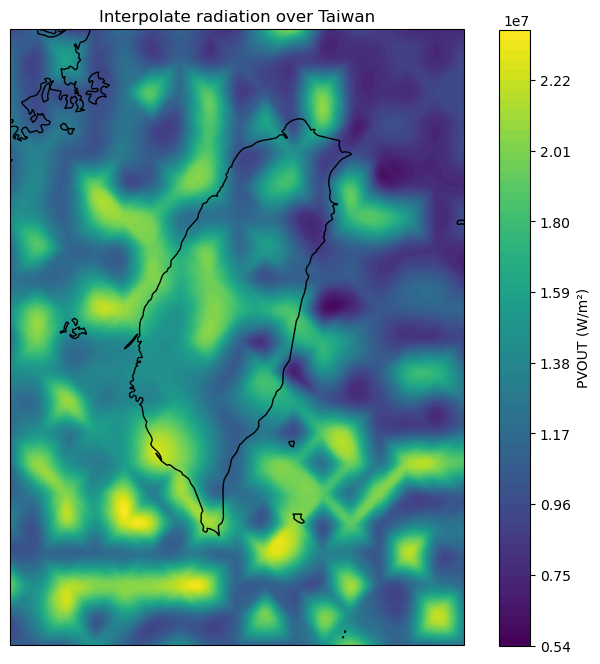

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from scipy.interpolate import griddata

# 1. Load data
df = pd.read_csv(r"C:\Users\User\Downloads\era5_rsds_2425.csv")
df.columns = df.columns.str.strip()

# 2. Rename for clarity if needed
df.rename(columns={"latitude": "lat", "longitude": "lon", "ssrd": "pvout"}, inplace=True)

# 3. Drop rows with missing lat, lon, or pvout
df = df.dropna(subset=["lat", "lon", "pvout"])

# 4. Create grid over Taiwan
num_points = 200
lon_grid = np.linspace(119, 123, num_points)
lat_grid = np.linspace(21, 26, num_points)
lon2d, lat2d = np.meshgrid(lon_grid, lat_grid)

# 5. Interpolate pvout onto grid
points = df[["lon", "lat"]].values
values = df["pvout"].values
grid_pvout = griddata(points, values, (lon2d, lat2d), method='cubic')

# 6. Plot map
fig = plt.figure(figsize=(9, 8))
ax = plt.axes(projection=ccrs.Mercator())
ax.set_extent([119, 123, 21, 26], crs=ccrs.PlateCarree())
ax.coastlines(resolution='10m')
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.OCEAN)

# 7. Plot interpolated pvout values
cf = ax.contourf(
    lon2d, lat2d, grid_pvout, 60,
    transform=ccrs.PlateCarree(), cmap="viridis"
)

# 8. Add colorbar and title
plt.colorbar(cf, ax=ax, label="PVOUT (W/m²)")
plt.title("Interpolate radiation over Taiwan")
plt.show()


Number of records in 2024-11: 357


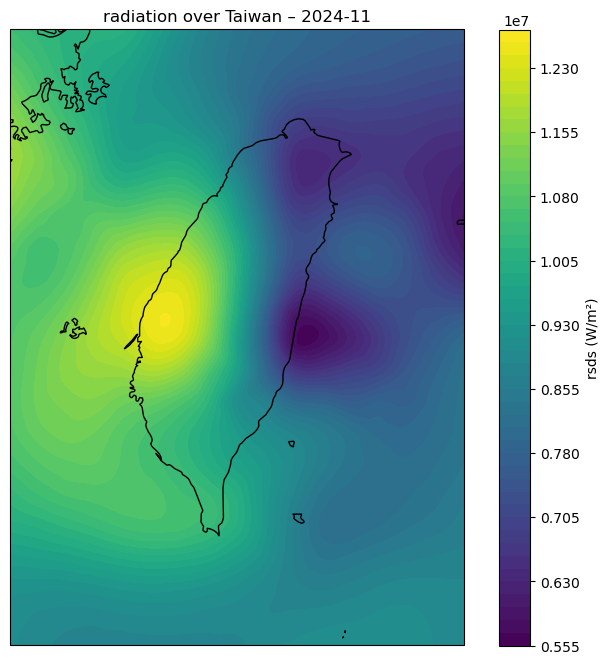

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from scipy.interpolate import griddata

# 1. Load data
df = pd.read_csv(r"C:\Users\User\Downloads\era5_rsds_2425.csv")
df.columns = df.columns.str.strip()

# 2. Rename for clarity if needed
df.rename(columns={"latitude": "lat", "longitude": "lon", "ssrd": "pvout"}, inplace=True)

# 3. Convert 'time' to datetime
df["time"] = pd.to_datetime(df["time"], errors="coerce")

# 4. Set target time (year-month)
target_time = "2024-11"

# 5. Filter data for that target month
df_filtered = df[df["time"].dt.strftime("%Y-%m") == target_time]

print(f"Number of records in {target_time}:", len(df_filtered))

# 6. Drop rows with missing lat, lon, or pvout
df_filtered = df_filtered.dropna(subset=["lat", "lon", "pvout"])

# Check if data is available for plotting
if df_filtered.empty:
    print(f"No data available for {target_time}.")
else:
    # 7. Create grid over Taiwan
    num_points = 200
    lon_grid = np.linspace(119, 123, num_points)
    lat_grid = np.linspace(21, 26, num_points)
    lon2d, lat2d = np.meshgrid(lon_grid, lat_grid)

    # 8. If multiple records per point, aggregate (e.g. mean)
    df_grouped = df_filtered.groupby(["lon", "lat"])["pvout"].mean().reset_index()

    # 9. Interpolate pvout onto grid
    points = df_grouped[["lon", "lat"]].values
    values = df_grouped["pvout"].values
    grid_pvout = griddata(points, values, (lon2d, lat2d), method='cubic')

    # 10. Plot map
    fig = plt.figure(figsize=(9, 8))
    ax = plt.axes(projection=ccrs.Mercator())
    ax.set_extent([119, 123, 21, 26], crs=ccrs.PlateCarree())
    ax.coastlines(resolution='10m')
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.add_feature(cfeature.LAND, edgecolor='black')
    ax.add_feature(cfeature.OCEAN)

    # 11. Plot interpolated pvout values
    cf = ax.contourf(
        lon2d, lat2d, grid_pvout, 60,
        transform=ccrs.PlateCarree(), cmap="viridis"
    )

    # 12. Add colorbar and title
    plt.colorbar(cf, ax=ax, label="rsds (W/m²)")
    plt.title(f"radiation over Taiwan – {target_time}")
    plt.show()


Number of records in 2024-11: 357


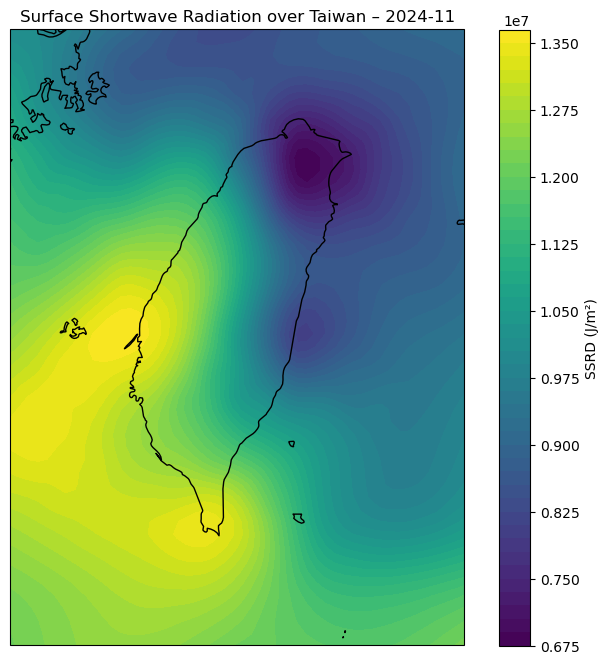

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from scipy.interpolate import griddata

# 1. Load data
df = pd.read_csv(r"C:\Users\User\Downloads\era5_rsds_201625_processed.csv")
df.columns = df.columns.str.strip()

# 2. Convert 'time' to datetime
df["time"] = pd.to_datetime(df["time"], errors="coerce")

# 3. Set target time (year-month)
target_time = "2024-11"

# 4. Filter data for that target month
df_filtered = df[df["time"].dt.strftime("%Y-%m") == target_time]

print(f"Number of records in {target_time}:", len(df_filtered))

# 5. Drop rows with missing lat, lon, or ssrd
df_filtered = df_filtered.dropna(subset=["lat", "lon", "ssrd (J/m²)"])

# Check if data is available for plotting
if df_filtered.empty:
    print(f"No data available for {target_time}.")
else:
    # 6. Create grid over Taiwan
    num_points = 50
    lon_grid = np.linspace(119, 123, num_points)
    lat_grid = np.linspace(21, 26, num_points)
    lon2d, lat2d = np.meshgrid(lon_grid, lat_grid)

    # 7. If multiple records per point, aggregate (e.g. mean)
    df_grouped = df_filtered.groupby(["lon", "lat"])["ssrd (J/m²)"].mean().reset_index()

    # 8. Interpolate ssrd onto grid
    points = df_grouped[["lon", "lat"]].values
    values = df_grouped["ssrd (J/m²)"].values
    grid_ssrd = griddata(points, values, (lon2d, lat2d), method='cubic')

    # 9. Plot map
    fig = plt.figure(figsize=(9, 8))
    ax = plt.axes(projection=ccrs.Mercator())
    ax.set_extent([119, 123, 21, 26], crs=ccrs.PlateCarree())
    ax.coastlines(resolution='10m')
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.add_feature(cfeature.LAND, edgecolor='black')
    ax.add_feature(cfeature.OCEAN)

    # 10. Plot interpolated ssrd values
    cf = ax.contourf(
        lon2d, lat2d, grid_ssrd, 60,
        transform=ccrs.PlateCarree(), cmap="viridis"
    )

    # 11. Add colorbar and title
    plt.colorbar(cf, ax=ax, label="SSRD (J/m²)")
    plt.title(f"Surface Shortwave Radiation over Taiwan – {target_time}")
    plt.show()
